In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import requests


In [5]:
benign=pd.read_csv('./data/IoT_data/1.benign.csv')
g_c=pd.read_csv('./data/IoT_data/1.gafgyt.combo.csv')
g_j=pd.read_csv('./data/IoT_data/1.gafgyt.junk.csv')
g_s=pd.read_csv('./data/IoT_data/1.gafgyt.scan.csv')
g_t=pd.read_csv('./data/IoT_data/1.gafgyt.tcp.csv')
g_u=pd.read_csv('./data/IoT_data/1.gafgyt.udp.csv')
m_a=pd.read_csv('./data/IoT_data/1.mirai.ack.csv')
m_sc=pd.read_csv('./data/IoT_data/1.mirai.scan.csv')
m_sy=pd.read_csv('./data/IoT_data/1.mirai.syn.csv')
m_u=pd.read_csv('./data/IoT_data/1.mirai.udp.csv')
m_u_p=pd.read_csv('./data/IoT_data/1.mirai.udpplain.csv')

# benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.15,replace=False)
g_j=g_j.sample(frac=0.25,replace=False)
g_s=g_s.sample(frac=0.25,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.17,replace=False)

benign['type']='benign'
m_u['type']='attack'
g_c['type']='attack'
g_j['type']='attack'
g_s['type']='attack'
g_t['type']='attack'
g_u['type']='attack'
m_a['type']='attack'
m_sc['type']='attack'
m_sy['type']='attack'
m_u_p['type']='attack'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [6]:
data.groupby('type')['type'].count()

type
attack    163437
benign     49548
Name: type, dtype: int64

In [7]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
208516,180.436572,247.237321,5.742339e+04,297.004194,273.323803,5.985489e+04,718.666602,312.743438,60956.478168,5094.993410,...,0.000000e+00,0.0,1.000000,60.0,0.0,60.000000,0.0,0.000000e+00,0.0,attack
39451,2.988515,102.000000,3.640000e-12,2.993097,102.000000,3.180000e-10,2.997779,101.998857,0.047875,4.215173,...,3.920000e-35,0.0,4.219798,102.0,0.0,144.249783,0.0,1.130000e-30,0.0,benign
146186,94.513273,527.164570,1.814254e+04,173.339387,485.307159,3.431924e+04,594.124501,425.632650,51322.193965,6286.184621,...,0.000000e+00,0.0,1.000000,566.0,0.0,566.000000,0.0,0.000000e+00,0.0,attack
194097,111.238814,71.594983,2.788613e+01,199.017191,70.530434,3.653603e+01,642.620016,69.624159,42.113864,5733.591525,...,0.000000e+00,0.0,1.000000,74.0,0.0,74.000000,0.0,0.000000e+00,0.0,attack
140015,109.977805,459.069582,4.267268e+04,197.536848,424.200461,5.164345e+04,626.827988,397.930813,56794.199568,6345.800304,...,0.000000e+00,0.0,1.000000,566.0,0.0,566.000000,0.0,0.000000e+00,0.0,attack


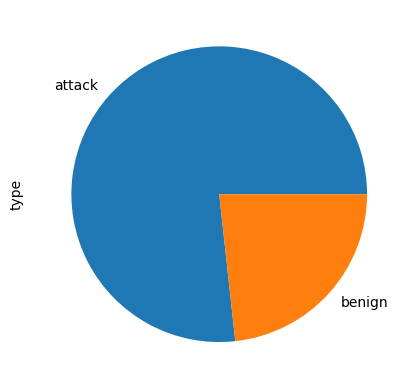

In [8]:
def pie_graph(feature):
    data[feature].value_counts().plot(kind="pie")
pie_graph('type')

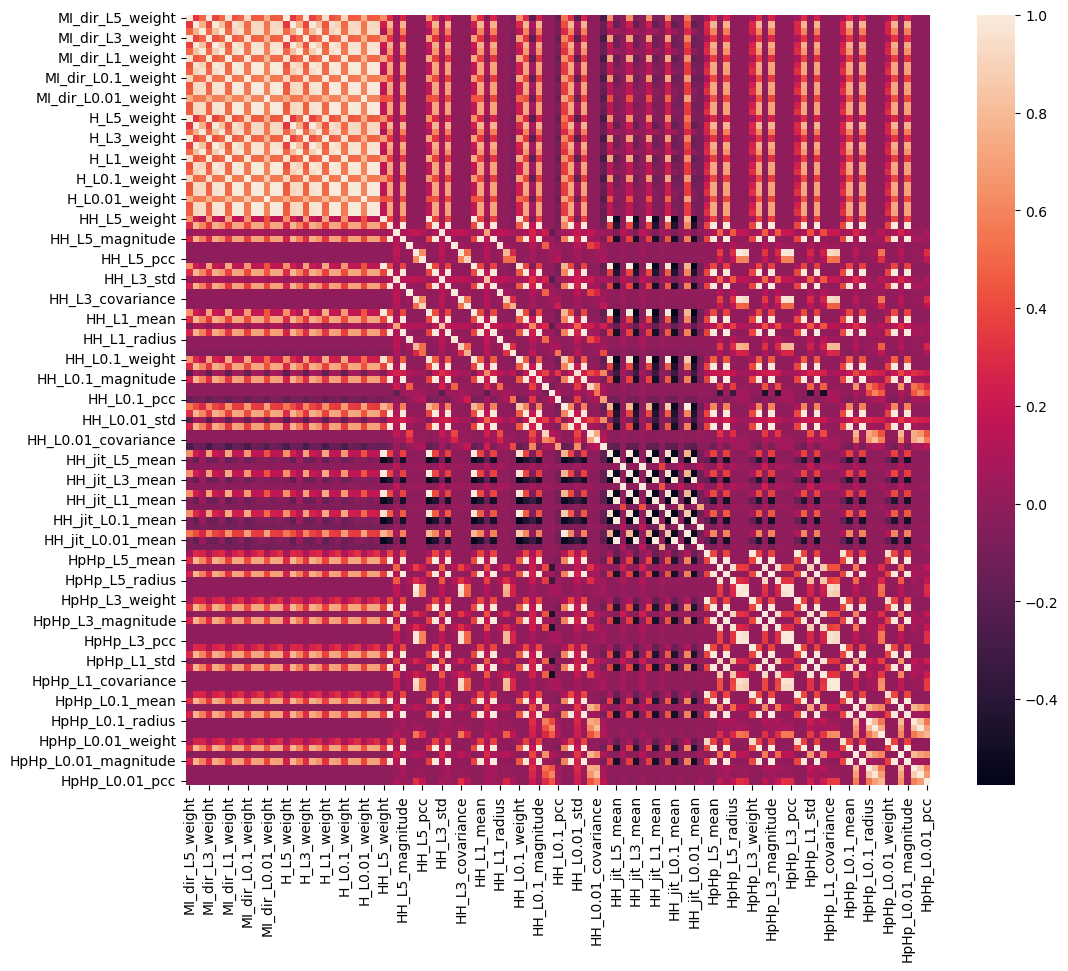

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
208516,180.436572,247.237321,5.742339e+04,297.004194,273.323803,5.985489e+04,718.666602,312.743438,60956.478168,5094.993410,...,0.000000e+00,0.0,1.000000,60.0,0.0,60.000000,0.0,0.000000e+00,0.0,attack
39451,2.988515,102.000000,3.640000e-12,2.993097,102.000000,3.180000e-10,2.997779,101.998857,0.047875,4.215173,...,3.920000e-35,0.0,4.219798,102.0,0.0,144.249783,0.0,1.130000e-30,0.0,benign
146186,94.513273,527.164570,1.814254e+04,173.339387,485.307159,3.431924e+04,594.124501,425.632650,51322.193965,6286.184621,...,0.000000e+00,0.0,1.000000,566.0,0.0,566.000000,0.0,0.000000e+00,0.0,attack
194097,111.238814,71.594983,2.788613e+01,199.017191,70.530434,3.653603e+01,642.620016,69.624159,42.113864,5733.591525,...,0.000000e+00,0.0,1.000000,74.0,0.0,74.000000,0.0,0.000000e+00,0.0,attack
140015,109.977805,459.069582,4.267268e+04,197.536848,424.200461,5.164345e+04,626.827988,397.930813,56794.199568,6345.800304,...,0.000000e+00,0.0,1.000000,566.0,0.0,566.000000,0.0,0.000000e+00,0.0,attack


In [9]:
data = data.dropna(axis=1)# drop columns with NaN

#df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

#df_filt = df.loc[:, df.nunique() > 1]

#corr = df_filt.corr()

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values
#numeric_cols = data.select_dtypes(include=[np.number]).columns
#data_numeric = data[numeric_cols]

corr = data.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr)

plt.show()

data.head()

In [11]:
data.to_pickle("./data/IoT_data/IotData.pkl")